(optional)

In [31]:
# from google.colab import drive
# import os
# drive.mount('/content/drive')

In [32]:
# os.chdir('...')

# **HW5: Brain signal classification**
In *HW 5*, you need to finish:

1.  Model Implementation Part: Implement LSTM and EEGNet models to predict the label of each samples.

2.  Model Competition Part: Implementing a model to reach better accuracy performance.

In [33]:
import numpy as np
import os
import math
import csv
import matplotlib.pyplot as plt
# Import the packages you need here

import tensorflow as tf
from tensorflow.keras import models, layers

In [34]:
data = np.load('data.npz')
label = np.load('label.npz')

In [35]:
X_train = data['X_train']
X_val = data['X_val']
X_test = data['X_test']

Y_train = label['Y_train']
Y_val = label['Y_val']

In [36]:
X_train.shape, X_val.shape, X_test.shape

((604, 22, 200), (152, 22, 200), (190, 22, 200))

In [37]:
Y_train.shape, Y_val.shape

((604, 1), (152, 1))

## Model Implementation Part

### LSTM

In [38]:
# Build your model here:
model_LSTM = models.Sequential()
model_LSTM.add(layers.InputLayer(input_shape=(22, 200)))
model_LSTM.add(layers.LSTM(128, return_sequences=True, dropout=0.2, implementation = 2))
model_LSTM.add(layers.LSTM(128, return_sequences=False, implementation = 2))
model_LSTM.add(layers.Dense(6))
model_LSTM.add(layers.Activation('softmax', name = 'softmax'))
model_LSTM.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model_LSTM.summary()
history_LSTM = model_LSTM.fit(X_train, Y_train, steps_per_epoch=12, validation_data=(X_val, Y_val), validation_steps=4, epochs=20)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 22, 128)           168448    
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
 softmax (Activation)        (None, 6)                 0         
                                                                 
Total params: 300,806
Trainable params: 300,806
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
12/12 [==============================] - 9s 239ms/step - loss: 1.6590 - accuracy: 0.3245 - val_loss: 1.3573 - val_accuracy: 0.5066
Epoch 2/20
12/12 [====================

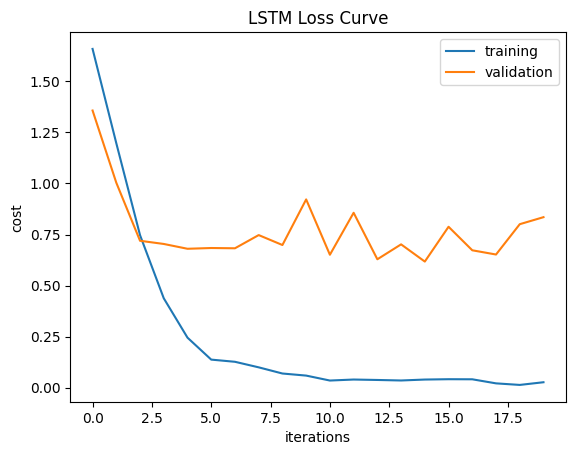

In [39]:
plt.plot(np.squeeze(history_LSTM.history['loss']), label = 'training')
plt.plot(np.squeeze(history_LSTM.history['val_loss']), label = 'validation')
plt.legend()
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("LSTM Loss Curve")
plt.show()

In [48]:
output = np.argmax(model_LSTM.predict(X_test), axis=1, keepdims=True)
assert(output.shape == (190, 1))
np.savetxt('lstm_output.csv', output, delimiter=",")

6/6 [==============================] - 0s 61ms/step


### EEGNet

In [41]:
# Build your model here:
def EEGNet(classes = 6, channels = 22, timeframe = 200, droprate = 0.5, filter1 = 8, depth = 8, filter2 = 16, normrate = 0.25):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(channels, timeframe, 1)))
    model.add(layers.Conv2D(filter1, (1, 64), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.DepthwiseConv2D((channels, 1), use_bias = False, depth_multiplier = depth, depthwise_constraint = tf.keras.constraints.max_norm(1.)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.AveragePooling2D((1, 4)))
    model.add(layers.Dropout(droprate))
    model.add(layers.SeparableConv2D(filter2, (1, 16), use_bias = False, padding = 'same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.AveragePooling2D((1, 8)))
    model.add(layers.Dropout(droprate))
    model.add(layers.Flatten(name = 'flatten'))
    model.add(layers.Dense(classes, name = 'dense', kernel_constraint = tf.keras.constraints.max_norm(normrate)))
    model.add(layers.Activation('softmax', name = 'softmax'))
    return model
model_EEGNet = EEGNet()
model_EEGNet.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model_EEGNet.summary()
history_EEGNet = model_EEGNet.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 200, 8)        512       
                                                                 
 batch_normalization_6 (Batc  (None, 22, 200, 8)       32        
 hNormalization)                                                 
                                                                 
 depthwise_conv2d_2 (Depthwi  (None, 1, 200, 64)       1408      
 seConv2D)                                                       
                                                                 
 batch_normalization_7 (Batc  (None, 1, 200, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 1, 200, 64)        0         
                                                      

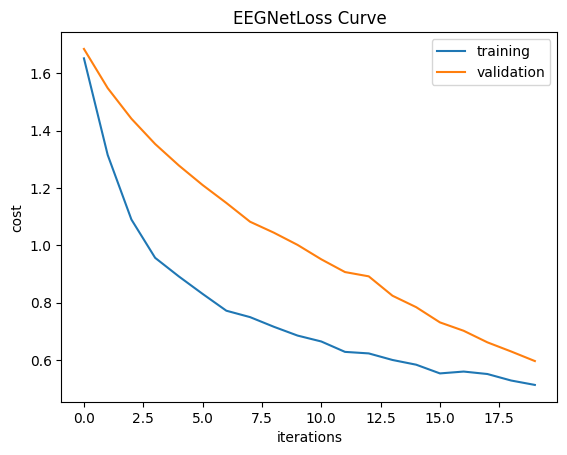

In [42]:
plt.plot(np.squeeze(history_EEGNet.history['loss']), label = 'training')
plt.plot(np.squeeze(history_EEGNet.history['val_loss']), label = 'validation')
plt.legend()
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("EEGNetLoss Curve")
plt.show()

In [46]:
output = np.argmax(model_EEGNet.predict(X_test), axis=1, keepdims=True)
assert(output.shape == (190, 1))
np.savetxt('eegnet_output.csv', output, delimiter=",")

6/6 [==============================] - 0s 26ms/step


## Model Competition Part

In [44]:
# Build your model here:
model_comp = model_EEGNet

In [47]:
output = np.argmax(model_comp.predict(X_test), axis=1, keepdims=True)
assert(output.shape == (190, 1))
np.savetxt('competition_output.csv', output, delimiter=",")

6/6 [==============================] - 0s 28ms/step
